In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'train_A.csv')

In [130]:
dg=pd.read_csv(r'train_A.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3000 non-null   int64  
 1   order_hour               3000 non-null   int64  
 2   day_of_week              3000 non-null   object 
 3   restaurant_type          3000 non-null   object 
 4   cuisine_type             3000 non-null   object 
 5   distance_km              2865 non-null   float64
 6   estimated_delivery_min   3000 non-null   int64  
 7   order_value_inr          2859 non-null   float64
 8   num_items                3000 non-null   int64  
 9   is_peak_hour             3000 non-null   bool   
 10  weather_condition        3000 non-null   object 
 11  traffic_density          3000 non-null   object 
 12  delivery_partner_rating  2849 non-null   float64
 13  delivery_partner_orders  2851 non-null   float64
 14  restaurant_rating       

In [4]:
sc_col=['distance_km', 'estimated_delivery_min', 'order_value_inr',
       'num_items','delivery_partner_rating',
       'delivery_partner_orders', 'restaurant_rating',
       'restaurant_avg_prep_min']

In [5]:
df[sc_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   distance_km              2865 non-null   float64
 1   estimated_delivery_min   3000 non-null   int64  
 2   order_value_inr          2859 non-null   float64
 3   num_items                3000 non-null   int64  
 4   delivery_partner_rating  2849 non-null   float64
 5   delivery_partner_orders  2851 non-null   float64
 6   restaurant_rating        2852 non-null   float64
 7   restaurant_avg_prep_min  2848 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 187.6 KB


In [15]:
col=['distance_km','order_value_inr','delivery_partner_rating','delivery_partner_orders','restaurant_rating','restaurant_avg_prep_min']

In [14]:
df.isna().sum()

id                           0
order_hour                   0
day_of_week                  0
restaurant_type              0
cuisine_type                 0
distance_km                135
estimated_delivery_min       0
order_value_inr            141
num_items                    0
is_peak_hour                 0
weather_condition            0
traffic_density              0
delivery_partner_rating    151
delivery_partner_orders    149
restaurant_rating          148
restaurant_avg_prep_min    152
is_promo_order               0
area_type                    0
is_late                      0
dtype: int64

In [20]:
for c in col:
    df[c].fillna(df.loc[df[c].notna(), c].mean(),inplace=True)
    print(df[c])

0       10.7
1        1.1
2       13.6
3        7.5
4        7.2
        ... 
2995     3.5
2996    14.2
2997     0.8
2998    14.5
2999     2.7
Name: distance_km, Length: 3000, dtype: float64
0       1208.0
1        172.0
2       2314.0
3       2754.0
4        789.0
         ...  
2995     741.0
2996     538.0
2997     518.0
2998    1445.0
2999     814.0
Name: order_value_inr, Length: 3000, dtype: float64
0       3.6
1       2.5
2       4.1
3       4.6
4       3.9
       ... 
2995    3.8
2996    4.6
2997    2.4
2998    4.2
2999    4.3
Name: delivery_partner_rating, Length: 3000, dtype: float64
0       3393.0
1       2331.0
2       3393.0
3       2618.0
4       4121.0
         ...  
2995    1676.0
2996    1778.0
2997     253.0
2998    3167.0
2999    1715.0
Name: delivery_partner_orders, Length: 3000, dtype: float64
0       4.3
1       4.7
2       3.1
3       3.8
4       4.4
       ... 
2995    3.2
2996    4.0
2997    3.8
2998    3.7
2999    3.0
Name: restaurant_rating, Length: 3000, dtyp

In [21]:
df.isna().sum()

id                         0
order_hour                 0
day_of_week                0
restaurant_type            0
cuisine_type               0
distance_km                0
estimated_delivery_min     0
order_value_inr            0
num_items                  0
is_peak_hour               0
weather_condition          0
traffic_density            0
delivery_partner_rating    0
delivery_partner_orders    0
restaurant_rating          0
restaurant_avg_prep_min    0
is_promo_order             0
area_type                  0
is_late                    0
dtype: int64

<Axes: >

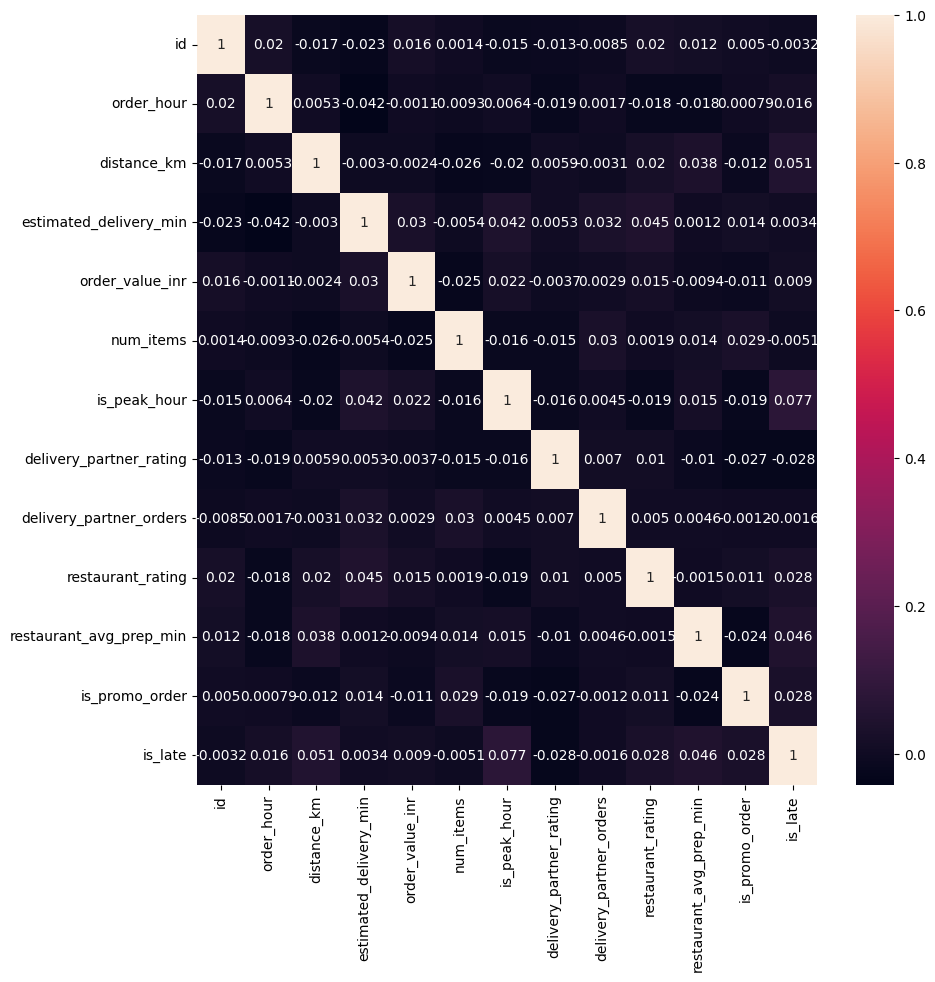

In [171]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
df

In [167]:
df['is_late'].replace({'on_time':0,'late':1},inplace=True)

In [24]:
col=df.columns

In [25]:
df_cleaned=df.copy()

In [26]:
df_cleaned.drop('id',axis=1,inplace=True)

In [27]:
sc_col=['distance_km', 'estimated_delivery_min', 'order_value_inr',
       'num_items','delivery_partner_rating',
       'delivery_partner_orders', 'restaurant_rating',
       'restaurant_avg_prep_min']

In [28]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
df_cleaned[sc_col] = scaler.fit_transform(df_cleaned[sc_col])

In [29]:
df_cleaned

,order_hour,day_of_week,restaurant_type,cuisine_type,distance_km,estimated_delivery_min,order_value_inr,num_items,is_peak_hour,weather_condition,traffic_density,delivery_partner_rating,delivery_partner_orders,restaurant_rating,restaurant_avg_prep_min,is_promo_order,area_type,is_late
0,6,sunday,cafe,south_indian,0.714972,0.201090,-0.388459,-0.011210,True,humid,moderate,-0.295013,0.647952,1.044372,0.155939,False,commercial,on_time
1,19,friday,casual_dining,dessert,-1.600389,1.177531,-1.661509,0.916484,True,light_rain,gridlock,-1.978142,-0.099044,1.737985,0.187181,True,college_area,late
2,14,sunday,fine_dining,dessert,1.414404,-1.539521,0.970609,-1.402751,True,clear,moderate,0.470045,0.647952,-1.036468,0.103869,False,college_area,late
3,10,monday,cloud_kitchen,south_indian,-0.056815,0.837899,1.511286,-1.402751,True,clear,gridlock,1.235104,0.102828,0.177355,0.416289,False,residential,late
4,7,thursday,fine_dining,chinese,-0.129170,-0.138541,-0.903332,0.220714,True,light_rain,heavy,0.164022,1.160018,1.217775,0.718294,False,residential,on_time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,5,tuesday,cloud_kitchen,other,-1.021548,0.413360,-0.962315,0.452637,True,hot,gridlock,0.011010,-0.559763,-0.863064,-0.822975,False,college_area,late
2996,14,monday,casual_dining,pizza_burger,1.559114,-0.647989,-1.211764,-0.475057,False,clear,moderate,1.235104,-0.488017,0.524162,2.009629,True,residential,on_time
2997,17,wednesday,cafe,other,-1.672744,0.880353,-1.236340,-0.706980,True,heavy_rain,heavy,-2.131154,-1.560682,0.177355,-0.906287,False,market,late
2998,23,friday,casual_dining,italian,1.631469,0.837899,-0.097230,-0.706980,True,hot,heavy,0.623057,0.488987,0.003952,-0.645938,True,residential,on_time


In [30]:
dum_col=['order_hour','day_of_week','restaurant_type','cuisine_type','weather_condition','traffic_density','area_type']

In [31]:
df_cleaned=pd.get_dummies(df_cleaned,columns=dum_col,dtype=int)

In [120]:
df_cleaned[['is_peak_hour','is_promo_order']]=df_cleaned[['is_peak_hour','is_promo_order']].astype(int)

In [121]:
df_cleaned

,distance_km,estimated_delivery_min,order_value_inr,num_items,is_peak_hour,delivery_partner_rating,delivery_partner_orders,restaurant_rating,restaurant_avg_prep_min,is_promo_order,...,weather_condition_light_rain,traffic_density_gridlock,traffic_density_heavy,traffic_density_low,traffic_density_moderate,area_type_college_area,area_type_commercial,area_type_highway,area_type_market,area_type_residential
0,0.714972,0.201090,-0.388459,-0.011210,1,-0.295013,0.647952,1.044372,0.155939,0,...,0,0,0,0,1,0,1,0,0,0
1,-1.600389,1.177531,-1.661509,0.916484,1,-1.978142,-0.099044,1.737985,0.187181,1,...,1,1,0,0,0,1,0,0,0,0
2,1.414404,-1.539521,0.970609,-1.402751,1,0.470045,0.647952,-1.036468,0.103869,0,...,0,0,0,0,1,1,0,0,0,0
3,-0.056815,0.837899,1.511286,-1.402751,1,1.235104,0.102828,0.177355,0.416289,0,...,0,1,0,0,0,0,0,0,0,1
4,-0.129170,-0.138541,-0.903332,0.220714,1,0.164022,1.160018,1.217775,0.718294,0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-1.021548,0.413360,-0.962315,0.452637,1,0.011010,-0.559763,-0.863064,-0.822975,0,...,0,1,0,0,0,1,0,0,0,0
2996,1.559114,-0.647989,-1.211764,-0.475057,0,1.235104,-0.488017,0.524162,2.009629,1,...,0,0,0,0,1,0,0,0,0,1
2997,-1.672744,0.880353,-1.236340,-0.706980,1,-2.131154,-1.560682,0.177355,-0.906287,0,...,0,0,1,0,0,0,0,0,1,0
2998,1.631469,0.837899,-0.097230,-0.706980,1,0.623057,0.488987,0.003952,-0.645938,1,...,0,0,1,0,0,0,0,0,0,1


In [33]:
df_cleaned['is_late'].replace({'on_time':0,'late':1},inplace=True)

In [218]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
X=df_cleaned.drop('is_late',axis=1)
y=df_cleaned['is_late']

In [220]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=32)
model.fit(X_train,y_train)

,n_neighbors,32
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [221]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=90,
    max_depth=17,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,90
,criterion,'gini'
,max_depth,17
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [222]:
y_predict=model.predict(X_test)
count = 0
for i, j in zip(y_test, y_predict):
    if i == j:
        count += 1

print(count)

pct = count * 100 / len(y_test)
print("accuracy: ",pct)
y_text = ['late' if i == 1 else 'on_time' for i in y]
#print(y_text)

385
accuracy:  64.16666666666667


# PIPELINE

In [224]:
test=pd.read_csv(r'test_A.csv')

In [225]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       600 non-null    int64  
 1   order_hour               600 non-null    int64  
 2   day_of_week              600 non-null    object 
 3   restaurant_type          600 non-null    object 
 4   cuisine_type             600 non-null    object 
 5   distance_km              600 non-null    float64
 6   estimated_delivery_min   600 non-null    int64  
 7   order_value_inr          600 non-null    float64
 8   num_items                600 non-null    int64  
 9   is_peak_hour             600 non-null    bool   
 10  weather_condition        600 non-null    object 
 11  traffic_density          600 non-null    object 
 12  delivery_partner_rating  600 non-null    float64
 13  delivery_partner_orders  600 non-null    int64  
 14  restaurant_rating        6

In [226]:
def pipe_l(dg):
    col=['distance_km','order_value_inr','delivery_partner_rating','delivery_partner_orders','restaurant_rating','restaurant_avg_prep_min']
    for c in col:
        dg[c].fillna(dg.loc[dg[c].notna(), c].mean(),inplace=True)
   # dg.drop('id',axis=1,inplace=True)
    sc_col=['distance_km', 'estimated_delivery_min', 'order_value_inr',
       'num_items','delivery_partner_rating',
       'delivery_partner_orders', 'restaurant_rating',
       'restaurant_avg_prep_min']
    from sklearn.preprocessing import StandardScaler 
    scaler=StandardScaler()
    dg[sc_col] = scaler.fit_transform(dg[sc_col])
    dum_col=['order_hour','day_of_week','restaurant_type','cuisine_type','weather_condition','traffic_density','area_type']
    dg=pd.get_dummies(dg,columns=dum_col,dtype=int)
    return dg
    
test_case=pipe_l(test)
test_case

,id,distance_km,estimated_delivery_min,order_value_inr,num_items,is_peak_hour,delivery_partner_rating,delivery_partner_orders,restaurant_rating,restaurant_avg_prep_min,...,weather_condition_light_rain,traffic_density_gridlock,traffic_density_heavy,traffic_density_low,traffic_density_moderate,area_type_college_area,area_type_commercial,area_type_highway,area_type_market,area_type_residential
0,1,-0.634677,-0.272154,1.500044,0.221515,True,-0.369004,-0.381133,1.490889,-1.218865,...,0,0,0,0,1,0,0,0,1,0
1,2,-1.200720,0.726577,1.201903,0.913750,False,-0.072417,-0.482081,0.179977,0.333631,...,0,1,0,0,0,0,1,0,0,0
2,3,1.016284,0.684963,-0.928011,1.375240,True,1.113932,1.399728,-0.803207,1.234079,...,0,0,0,0,1,0,0,0,1,0
3,4,0.898359,-0.688292,1.227425,-1.162954,False,-1.555352,0.243352,1.490889,-0.659966,...,0,0,1,0,0,0,0,0,1,0
4,5,1.582328,-1.104430,-1.654223,-0.009230,False,-0.813884,-1.519408,0.016113,-0.577166,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,1.464402,1.142714,1.403757,-1.624444,False,-0.962178,-0.285058,-0.311615,0.747631,...,0,0,0,0,1,0,0,1,0,0
596,597,-1.271476,1.059487,0.772672,-0.470720,False,-0.517297,-0.618535,1.327025,-1.798464,...,0,0,1,0,0,0,1,0,0,0
597,598,1.511573,-1.104430,-0.056788,1.144495,False,0.520758,0.072088,-1.458663,0.043832,...,0,0,0,0,1,0,0,0,1,0
598,599,1.322891,-0.521837,1.645055,-1.624444,False,0.520758,1.675420,0.999297,-1.322365,...,1,0,1,0,0,0,0,1,0,0


In [157]:
t=test_case.drop('is_late',axis=1)
y=model.predict(t)
y_text = ['late' if i == 1 else 'on_time' for i in y]

In [229]:
final_train=df_cleaned.drop('is_late',axis=1)
model.fit(final_train,df_cleaned['is_late'])

,n_estimators,90
,criterion,'gini'
,max_depth,17
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [231]:
y=model.predict(test_case.drop('id',axis=1))
y_text = ['late' if i == 1 else 'on_time' for i in y]

In [232]:
answer=pd.DataFrame(y_text)

In [233]:
answer.to_csv('submit_answer.csv',index=False)

In [234]:
answer

,0
0,on_time
1,on_time
2,late
3,on_time
4,on_time
...,...
595,on_time
596,on_time
597,on_time
598,on_time
